In [105]:
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Regularized Word Embeddings in Text Classification and in Ad-hoc IR
## 4. Document Representations

We consider three document representations:

- Vector Space Model (VSM)
- Soft Vector Space Model (Soft VSM)
- Latent Semantic Indexing (LSI)

We consider four term weighting schemes:

- Binary
- Bag of Words (BOW)
- TF-IDF
- Okapi BM25

And we consider two similarities:

- Inner Product (IP)
- Word Mover's Distance (WMD)

## 6. Evaluation

Not all combinations of document representations, term weighting schemes, and similarities are evaluated:

| ↓ Weights, Space and similarity → | VSM IP | VSM WMD | Soft VSM IP | LSI IP |
|--|--|--|--|--|
| Binary | ❌ | ❌ | ✅<sup>2, 🕑</sup>  | ❌ |
| BOW | ✅ | ✅<sup>🕑</sup> | ✅<sup>1, 2, 🕑</sup> | ❌ |
| TF-IDF | ✅ | ❌ | ✅<sup>🕑</sup> | ✅ |
| Okapi BM25 | ✅ | ❌ | ❌ | ❌ |

<sup>1</sup> We use non-normalized BOW queries, $L_1$-normalized BOW collection documents, and the non-normalized inner product.  
<sup>2</sup> We only use the dense soft VSM.  
<sup>🕑</sup> Not yet implemented.

In [106]:
configurations = [
    ('vsm', 'bow', 'inner_product', 32),
    ('vsm', 'tfidf', 'inner_product', 32),
    ('vsm', 'bm25', 'inner_product', 32),
    ('lsi', 'tfidf', 'inner_product', 32),
]
friendly_names = {
    ('vsm', 'bow', 'inner_product', 32): 'BOW (Frakes & Baesa-Yates, 1992)',
    ('vsm', 'tfidf', 'inner_product', 32): 'TF-IDF (Jones, 1972)',
    ('vsm', 'bm25', 'inner_product', 32): 'Okapi BM25 (Robertson & Walker, 1994)',
    ('lsi', 'tfidf', 'inner_product', 32): 'LSI (Deerwester et al., 1990)',
}

There are several parameters that are tuned by grid search.

- Soft VSM:
    - `dense`${}\in\{$ `True`, `False` $\}$
    - `symmetric`${}\in\{$ `True`, `False` $\}$ (only relevant when `dense` is `False`)
    - `positive_definite`${}\in\{$ `True`, `False` $\}$ (only relevant when `dense` is `False`)
    - `tfidf`${}\in\{$ `<TfidfModel>`, `None` $\}$ (only relevant when `dense` is `False`)
    - `nonzero_limit`${}\in\{100, 200, \ldots, 600\}$
- TFIDF:
    - `slope`${}\in\{0.0, 0.1, \ldots, 1.0\}$
- Okapi BM25:
    - $k_1\in\{1.2, 1.3, \ldots, 2.0\}$

   
### 6.1 Datasets


In [3]:
from common import ClassificationResult

results = dict()


def load_results(name, dataset_loader):
    """Loads classification results for a given dataset.
    
    Parameters
    ----------
    name : str
        The name of a dataset.
    dataset_loader : callable
        Loads training, validation, and test sets from the dataset.
    """

    results[name] = dict()
    datasets = None
    for configuration in configurations:
        basename = '{}-{}'.format(name, '-'.join(map(str, configuration)))
        try:
            results[name][configuration] = ClassificationResult.from_file(basename)
        except IOError:
            if datasets is None:
                datasets = dataset_loader()
            train, validation, test = datasets
            result = train.classify(validation, test, *configuration)
            result.to_file(basename)
            results[name][configuration] = result

2019-01-30 22:38:07,147 : INFO : 'pattern' package not found; tag filters are not available for English



For classification, we use the following datasets:

- [20 Newsgroups][] (1995, 14M, 18.83k documents, *free*)

 [20 Newsgroups]: http://qwone.com/~jason/20Newsgroups/ (Home Page for 20 Newsgroups Data Set)

In [4]:
from common import load_newsgroups

load_results('newsgroups', load_newsgroups)

2019-01-30 22:38:07,514 : INFO : Loading a classification result from file results/classification-newsgroups-vsm-bow-inner_product-32.pkl.xz.
2019-01-30 22:38:07,520 : INFO : Loading a classification result from file results/classification-newsgroups-vsm-tfidf-inner_product-32.pkl.xz.
2019-01-30 22:38:07,521 : INFO : Loading a classification result from file results/classification-newsgroups-vsm-bm25-inner_product-32.pkl.xz.
2019-01-30 22:38:07,526 : INFO : Loading a classification result from file results/classification-newsgroups-lsi-tfidf-inner_product-32.pkl.xz.



- [AMAZON][] (2015, 20G, 142.8m documents, *free*)
    - For computational efficiency, we subsample the dataset using four of the 24 product categories.
    - For computational efficiency, we subsample the dataset using only 1 out of every 100 review texts.

 [AMAZON]: http://jmcauley.ucsd.edu/data/amazon/ (Amazon review data)


In [5]:
from common import load_amazon

# load_results('bbc', load_bbc)  # Not yet computed.


- [BBC] (2005, 864K, 2.23k documents, *free*)

 [BBC]: http://mlg.ucd.ie/datasets/bbc.html (Insight - BBC Datasets)

In [6]:
from common import load_bbc

# load_results('bbc', load_bbc)  # Not yet computed.


- [BBCSport][BBC] (2005, 255K, 737 documents, *free*)

 [BBC]: http://mlg.ucd.ie/datasets/bbc.html (Insight - BBC Datasets)

In [7]:
from common import load_bbcsport

# load_results('bbcsport', load_bbcsport)  # Not yet computed.


- [OHSUMED][] (1994, 24M, 50.22k documents, *free*)

 [OHSUMED]: http://disi.unitn.it/moschitti/corpora.htm (Donwloadable Corpora)


In [8]:
from common import load_ohsumed

# load_results('bbcsport', load_ohsumed)  # Not yet computed.


- [Reuters-21578][] (1987, 8.2M, 215.78k documents, *free*)

 [Reuters-21578]: http://www.daviddlewis.com/resources/testcollections/reuters21578/ (Reuters-21578 Text Categorization Test Collection)

In [9]:
from common import load_reuters

# load_results('reuters', load_reuters)  # Not yet computed.

- [TWITTER][] (2011, 160K, 6.4k documents, *free*)

 [TWITTER]: https://web.archive.org/web/20180328044709/www.sananalytics.com/lab/twitter-sentiment/ (Sanders Analytics - Twitter Sentiment Corpus)

In [10]:
from common import load_twitter

# load_results('twitter', load_twitter)  # Not yet computed.


### 6.3 Classification

We compare the individual document representations, term weighing schemes, and similarities using $k$NN on standard datasets. In addition to the above parameters, we also tune $k\in\{1,2,\ldots,19\}$.

## 7. Results

TODO (Michal Štefánik).  
Useful links:

- [Monochrome (Black & white) plots in matplotlib](http://olsgaard.dk/monochrome-black-white-plots-in-matplotlib.html)
- [Add confidence interval on barplot](https://python-graph-gallery.com/8-add-confidence-interval-on-barplot/)

In [11]:
results['newsgroups']

{('vsm',
  'bow',
  'inner_product',
  32): <ClassificationResult, accuracy: 42.19%, params: {'k': 1, 'measure': 'inner_product', 'weights': 'bow', 'num_bits': 32, 'space': 'vsm'}>,
 ('vsm',
  'tfidf',
  'inner_product',
  32): <ClassificationResult, accuracy: 67.06%, params: {'num_bits': 32, 'k': 17, 'measure': 'inner_product', 'weights': 'tfidf', 'slope': 1.0, 'space': 'vsm'}>,
 ('vsm',
  'bm25',
  'inner_product',
  32): <ClassificationResult, accuracy: 61.18%, params: {'num_bits': 32, 'k': 1, 'measure': 'inner_product', 'weights': 'bm25', 'k1': 2.0, 'space': 'vsm'}>,
 ('lsi',
  'tfidf',
  'inner_product',
  32): <ClassificationResult, accuracy: 63.99%, params: {'num_bits': 32, 'k': 1, 'measure': 'inner_product', 'weights': 'tfidf', 'slope': 1.0, 'space': 'lsi'}>}

In [12]:
help(results['newsgroups'][('vsm', 'bow', 'inner_product', 32)].accuracy)

Help on method accuracy in module common:

accuracy(significance_level=0.05) method of common.ClassificationResult instance
    Returns pointwise and interval estimates for the accuracy.
    
    Parameters
    ----------
    significance_level : scalar
        The likelihood that the actual accuracy falls into the
        confidence interval.
    
    Returns
    -------
    pointwise_estimate : scalar
        An unbiased pointwise estimate of the expected value of
        the accuracy.
    lower_bound : scalar
        The lower bound of the confidence interval for the accuracy.
    upper_bound : scalar
        The upper bound of the confidence interval for the accuracy.



In [13]:
results['newsgroups'][('vsm', 'tfidf', 'inner_product', 32)].accuracy()

(0.6706054168879447, 0.6599063054175914, 0.6811305932543966)

In [68]:
results['newsgroups2'] = results['newsgroups']

In [44]:
styles = ({'hatch': '///', 'color': 'w', 'zorder': 10},
          {'hatch': '--', 'color': 'w', 'zorder': 10},
          {'hatch': '...', 'color': 'w', 'zorder': 10},
          {'hatch': 'xxx', 'color': 'w', 'zorder': 10})

In [116]:
import math

(0.4108222716479096, 0.4331234898936243)
(0.4108222716479096, 0.4331234898936243)
(0.6599063054175914, 0.6811305932543966)
(0.6599063054175914, 0.6811305932543966)
(0.6007292718431021, 0.6227361512555858)
(0.6007292718431021, 0.6227361512555858)
(0.6290266904725896, 0.6507031859478583)
(0.6290266904725896, 0.6507031859478583)


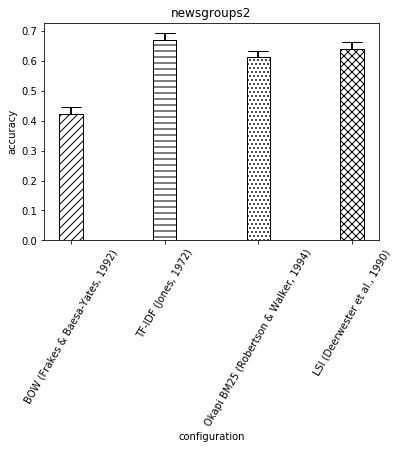

In [148]:
# TODO: segmentation by groups needs to be done as in
# https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

import matplotlib.pyplot as plt
import numpy as np

width = 0.3

for i, _ in enumerate(ind):
    for dataset_i, dataset in enumerate(results.keys()):
        ax = plt.subplot(111)

        x = [friendly_names[k] for k in results[dataset]]
        y = [v.accuracy()[0] for v in results[dataset].values()]
        yerr1 = [v.accuracy()[1] for v in results[dataset].values()]
        yerr2 = [v.accuracy()[2] for v in results[dataset].values()]

        ind = np.arange(len(y))  # the x locations for the groups
        print((yerr1[i], yerr2[i]))
        plt.bar(ind[i], y[i], width, **styles[i], align='center',
                yerr=np.array([[yerr1[i], yerr2[i]-yerr1[i]]]).transpose(), 
                capsize=10, edgecolor="black", )
        ax.set_xticks(ind)
        ax.set_xticklabels(x, minor=False, rotation=60)
        plt.title(dataset)
        plt.ylabel('accuracy')
        plt.xlabel('configuration')
fig.set_size_inches(10, 5)


In [153]:
results['newsgroups']

{('vsm',
  'bow',
  'inner_product',
  32): <ClassificationResult, accuracy: 42.19%, params: {'k': 1, 'measure': 'inner_product', 'weights': 'bow', 'num_bits': 32, 'space': 'vsm'}>,
 ('vsm',
  'tfidf',
  'inner_product',
  32): <ClassificationResult, accuracy: 67.06%, params: {'num_bits': 32, 'k': 17, 'measure': 'inner_product', 'weights': 'tfidf', 'slope': 1.0, 'space': 'vsm'}>,
 ('vsm',
  'bm25',
  'inner_product',
  32): <ClassificationResult, accuracy: 61.18%, params: {'num_bits': 32, 'k': 1, 'measure': 'inner_product', 'weights': 'bm25', 'k1': 2.0, 'space': 'vsm'}>,
 ('lsi',
  'tfidf',
  'inner_product',
  32): <ClassificationResult, accuracy: 63.99%, params: {'num_bits': 32, 'k': 1, 'measure': 'inner_product', 'weights': 'tfidf', 'slope': 1.0, 'space': 'lsi'}>}

[0. 1.]
[0.2 1.2]
[0.4 1.4]
[0.6 1.6]


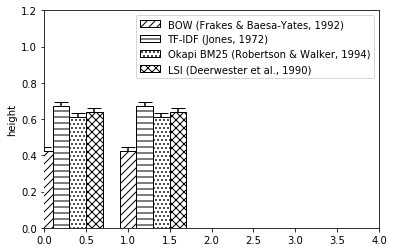

In [194]:
barWidth = 0.2
offset = 0

for m_i, method in enumerate(results['newsgroups'].keys()):
    y = [results[dataset][method].accuracy()[0] for dataset in results.keys()]
    y_err_lower = [results[dataset][method].accuracy()[1] for dataset in results.keys()]
    y_err_upper = [results[dataset][method].accuracy()[2] for dataset in results.keys()]
    y_err = np.array(y_err_upper) - np.array(y_err_lower)
    
    x = np.arange(len(y)) + (offset+(m_i*barWidth))
    print(x)
    plt.bar(x, y, width = barWidth, **styles[m_i], edgecolor = 'black', 
            yerr=y_err, capsize=7, label=friendly_names[method])
    
# general layout
# plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend(loc='upper right')
# plt.figure(figsize=(30,20))

plt.xlim(0, 4)  # adjust the right leaving left unchanged

plt.ylim(0, 1.2)

# Show graphic
plt.show()


In [157]:
y

[0.6399362719065321, 0.6399362719065321]

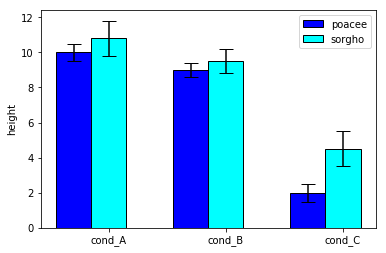

In [149]:
# libraries
x = [friendly_names[k] for k in results[dataset]]
y = [v.accuracy()[0] for v in results[dataset].values()]
yerr1 = [v.accuracy()[1] for v in results[dataset].values()]
yerr2 = [v.accuracy()[2] for v in results[dataset].values()]
 
# width of the bars
barWidth = 0.3


for m_i, method in enumerate(results['newsgroups'].keys()):
    y = [results[dataset][m_i][method] for dataset in results.keys()]
    
# Choose the height of the blue bars
bars1 = [10, 9, 2]
 
# Choose the height of the cyan bars
bars2 = [10.8, 9.5, 4.5]
 
# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()
